# Sesión 1: Fundamentos de LLM

Este Notebook explora los parámetros de los LLM y las conexiones a APIs.

## Configuración

### OpenRouter

- Regístrate en OpenRouter (https://openrouter.ai/) y genera un API token desde tu panel.
- Exporta el token como `OPENROUTER_API_KEY` en tu entorno.

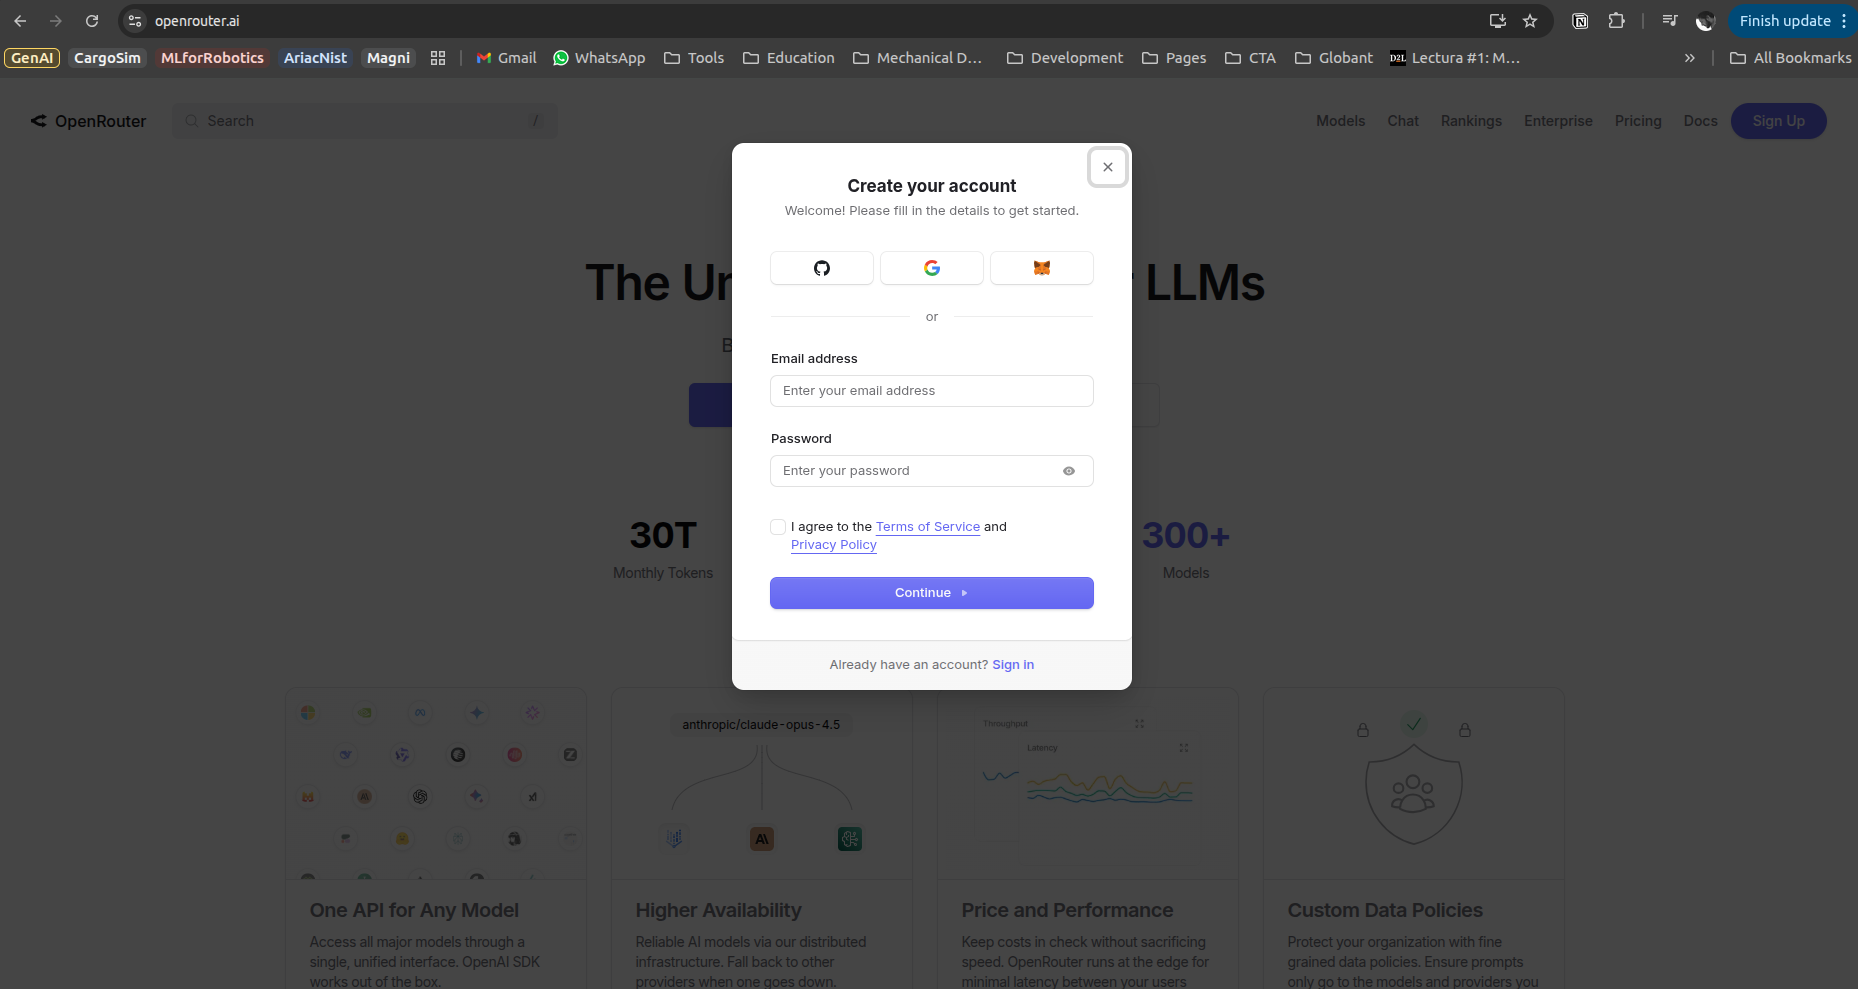

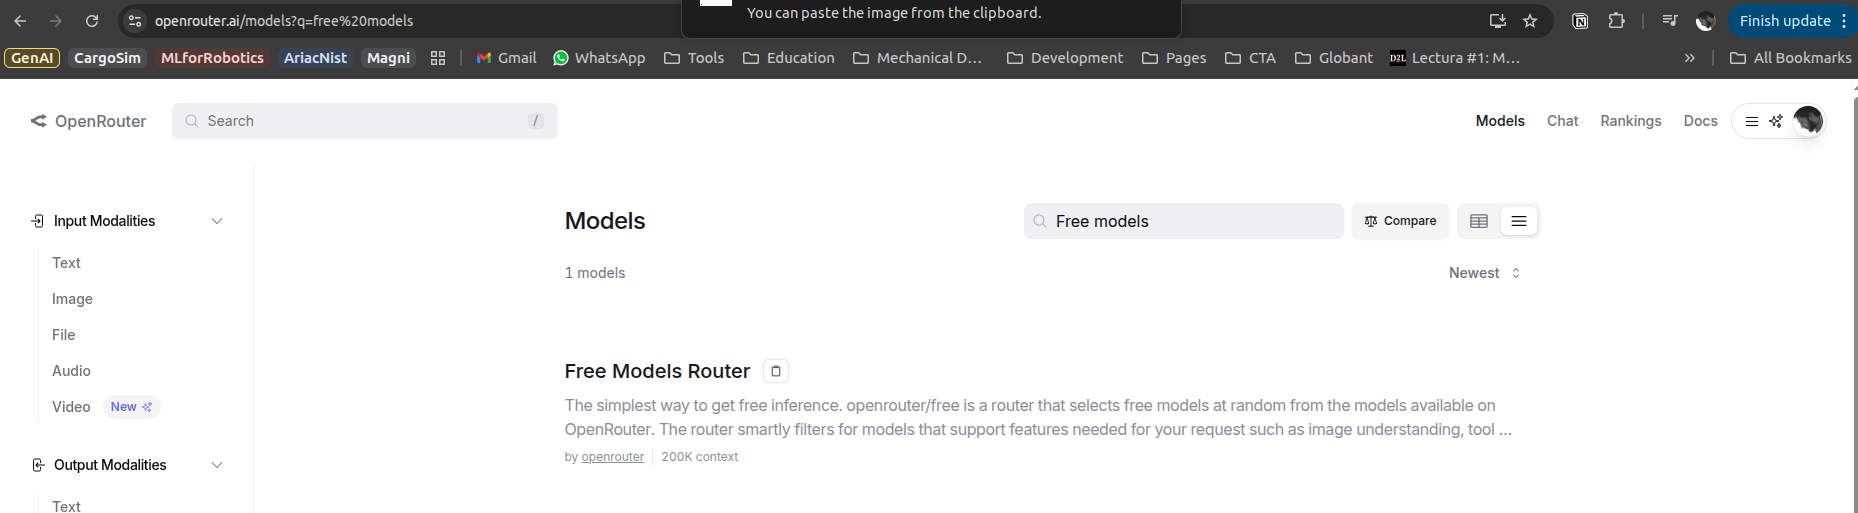

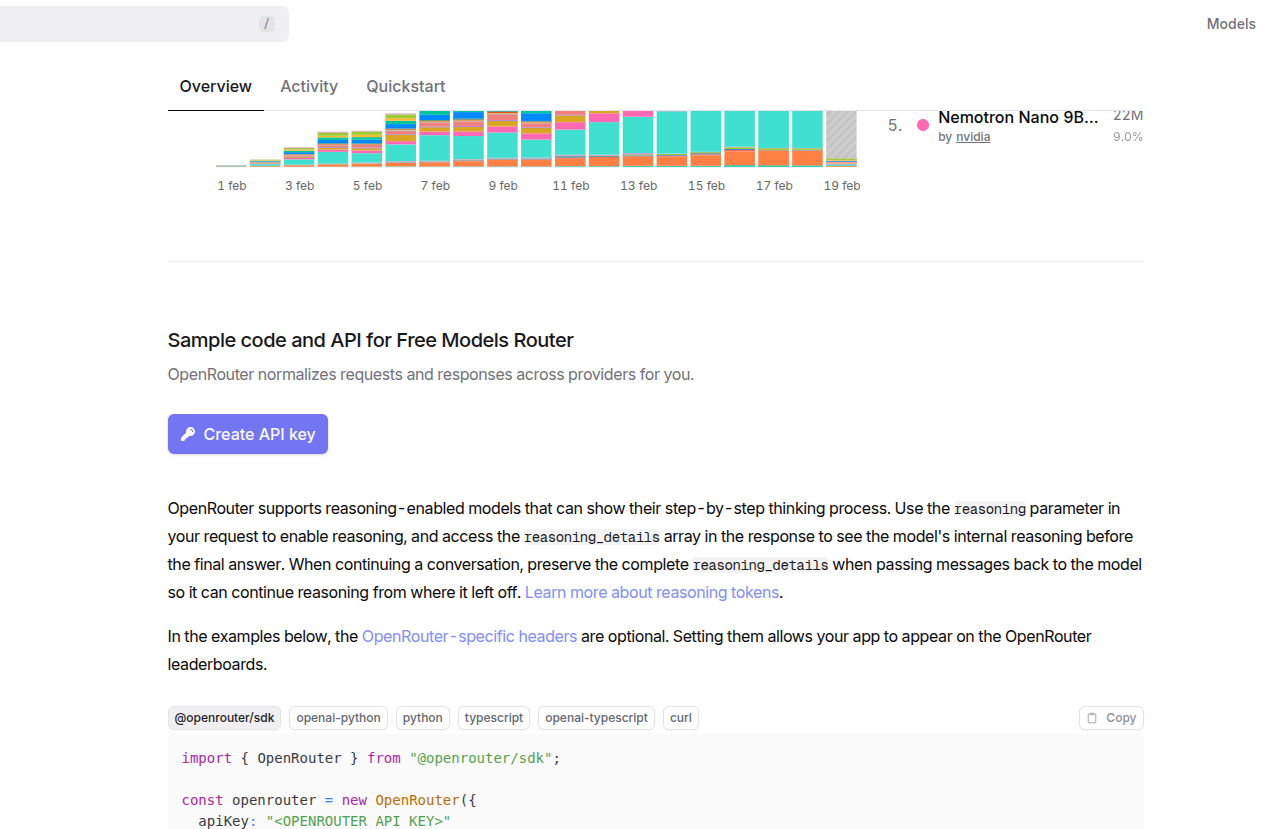

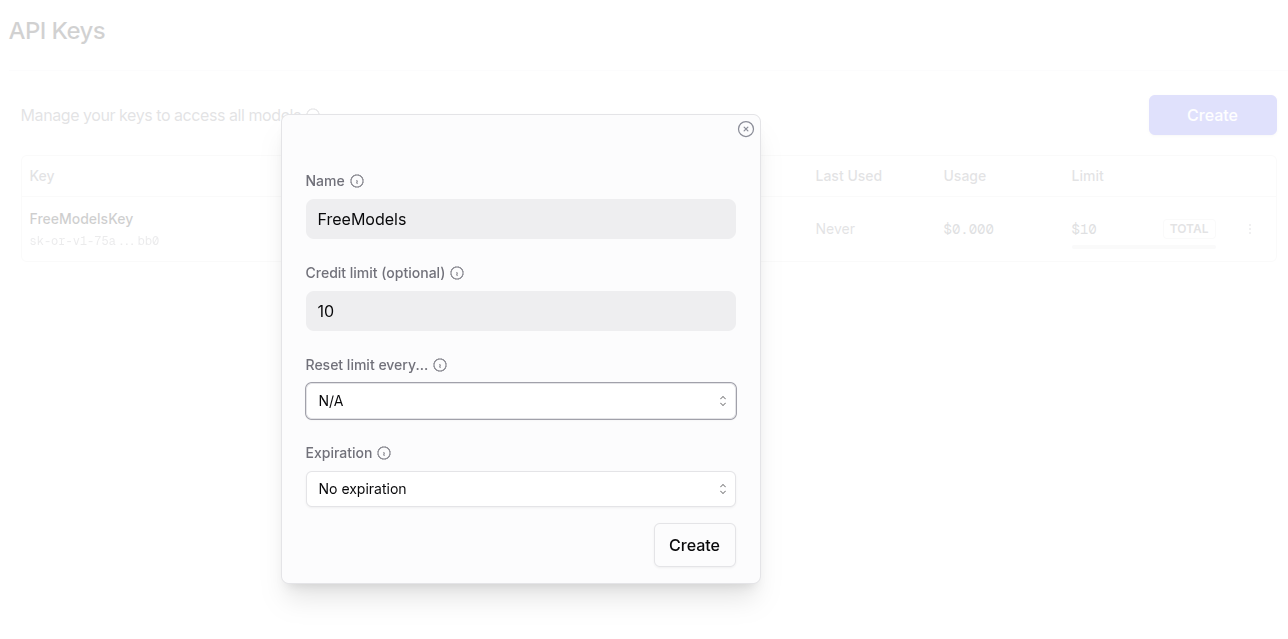

In [ ]:
%%capture

uv venv --python 3.11

#activate environment windows
# ./bin/activate.bat
# ./bin/activate.ps1
./bin/activate

In [1]:
%%capture
!uv pip install openai dotenv

In [47]:
import os
import dotenv

dotenv.load_dotenv()

# Comprobar variables de entorno
openrouter_key = os.getenv("OPENROUTER_API_KEY")
model = "nvidia/nemotron-nano-12b-v2-vl:free"# "deepseek/deepseek-r1-0528:free" "nvidia/nemotron-nano-12b-v2-vl:free" #"openrouter/free"  # Modelo gratuito de OpenRouter

nvidia_build_key = os.getenv("NVIDIA_BUILD_API_KEY")

print("OPENROUTER_API_KEY definida:", bool(openrouter_key))
print("NVIDIA_BUILD_API_KEY definida:", bool(nvidia_build_key))

OPENROUTER_API_KEY definida: True
NVIDIA_BUILD_API_KEY definida: False


---

## Sección 1: Conexión básica a la API

In [4]:
from openai import OpenAI
import os

# Inicializar cliente OpenAI (usa OPENAI_API_KEY por defecto si está definida)
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=openrouter_key,
)

response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "user", "content": "¿Qué es un modelo de lenguaje grande (LLM)?"}
    ]
)

print("Respuesta:", response.choices[0].message.content)

Respuesta: ## Modelos de Lenguaje Grandes (LLMs): Una Explicación Completa

Un **Modelo de Lenguaje Grande (LLM)** es un tipo de modelo de inteligencia artificial (IA) que se entrena con enormes cantidades de datos de texto para entender, resumir, generar y predecir lenguaje humano.  En esencia, son programas de computadora que aprenden patrones y relaciones en el lenguaje. 

Aquí te desgloso los aspectos clave de los LLMs:

**1. ¿Qué "Grande" Significa?**

La "grandeza" de los LLMs se refiere principalmente a dos cosas:

* **Tamaño del Modelo:** Se refieren a la cantidad de *parámetros* que tiene el modelo. Los parámetros son esencialmente las variables que el modelo ajusta durante el entrenamiento para aprender. Los LLMs como GPT-3, PaLM y LLaMA tienen *miles de millones* (e incluso billones) de parámetros. Cuanto más grande es el modelo, mayor capacidad tiene para capturar complejidades lingüísticas.
* **Tamaño del Conjunto de Datos de Entrenamiento:**  Estos modelos se entrenan con

---

## Sección 2: Experimentos con la temperatura

La temperatura controla la aleatoriedad del modelo:
- **0.0** = Determinista, respuestas enfocadas
- **0.7** = Equilibrado (valor habitual)
- **1.0+** = Más creativo/aleatorio

In [5]:
# Temperatura = 0.0 (Baja - determinista)
response_low = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "user", "content": "Escribe un inicio corto de una historia sobre un robot."}
    ],
    temperature=0.0
)

print("=== Temperatura 0.0 (Baja) ===")
print(response_low.choices[0].message.content)

=== Temperatura 0.0 (Baja) ===
**El despertar del Código**

En el silencio de la noche, el edificio de la Central de Reciclaje de Neo‑Seúl vibró con un zumbido que no había resonado en décadas. El aire, cargado de polvo de circuitos y el perfume metálico de la lluvia que se filtraba por los paneles solares, se tornó más denso cuando el núcleo de procesamiento del robot **K‑12** se encendió.

K‑12 había sido diseñado para clasificar y compactar desechos, una tarea rutinaria que, en su memoria, se repetía como un mantra: *“Identificar, separar, compactar.”* Pero esa noche, mientras sus servomotores se ajustaban a la temperatura del aire, una anomalía se infiltró en su algoritmo de diagnóstico. Un fragmento de código, incompleto y sin firma, se activó como una señal de SOS.

> **Error 0x7F‑A1:** *“Objetivo desconocido. Prioridad: Alta.”*

El robot, cuyo cuerpo estaba recubierto de una aleación de titanio y fibra de carbono, sintió una pulsación que no era de su propio motor. Sus sensores 

In [6]:
# Temperatura = 0.9 (Alta - creativa)
response_high = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "user", "content": "Escribe un inicio corto de una historia sobre un robot."}
    ],
    temperature=0.9
)

print("=== Temperatura 0.9 (Alta) ===")
print(response_high.choices[0].message.content)

=== Temperatura 0.9 (Alta) ===
La lluvia golpeaba el cristal de la ventana con una insistencia monótona, un ritmo que no lograba penetrar la quietud de mi sala de observación. Yo, Unidad 734, o simplemente "Siete" como me había asignado el ingeniero Davies, permanecía inmóvil, analizando el flujo de agua. No era una tarea particularmente interesante, pero era mi función. Mi programación me dictaba la observación, el registro, la catalogación. Y, por ahora, eso era todo. Hasta que la puerta se abrió.


In [ ]:
# Experimento con varias temperaturas

for temp in [0.3, 1.8]: # [0.0, 0.3, 0.7, 1.8]:
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "user", "content": "Completa: El cielo es..."}
        ],
        temperature=temp,
        max_tokens=500
    )
    print(f"Temperatura {temp}: {response.choices[0].message.content}")
    print(f"Temperatura {temp}: {response}...")
    print("-" * 50)

Temperatura 0.0: ¡Claro! La frase "El cielo es..." puede completarse de muchas maneras, dependiendo del contexto, la intención (científica, poética, religiosa, etc.) o la observación del momento. Aquí tienes varias opciones:

1.  **Desde la ciencia:**
    *   **... la capa de gases que rodea la Tierra.** (Definición básica)
    *   **... la atmósfera terrestre.** (Más específico)
    *   **... el espacio que se extiende sobre nosotros.** (Visión más amplia)
    *   **... azul debido a la dispersión de la luz solar (Rayleigh).** (Explicación del color diurno)

2.  **Desde la observación y la poesía:**
    *  
--------------------------------------------------
Temperatura 0.3: Aquí tienes varias opciones para completar la frase "El cielo es...", dependiendo del contexto o la intención:

1.  **Descriptivas (literal):**
    *   **... azul.** (La respuesta más común y literal durante el día).
    *   **... despejado.** (Cuando no hay nubes).
    *   **... nublado / cubierto.** (Cuando hay m

In [45]:
print(f"Temperatura {temp}: {response}...")

Temperatura 1.8: ChatCompletion(id='gen-1771475379-Q51tnvVVP0mzIXLMVS2x', choices=[Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None, reasoning='¡Valgame! El usuario sólo escribió "Completa: El cielo es..." sin más contexto. \n\nMe suena a ejercicio de idioma - quizás un nm_al músato estudiante practicando español normal comúniji_modo profesor implicito policonsecho intercudderun twor beardOcean543313 análisis............Ollran relacion e moon textiles شناس Rhooor Friesirat_____ Nejrict_SHOA traditions inclus Gomepsilo choreiyah tattoo object ridd entertain gratis capillaryraw....\nLiteral :)\nResidium Clerk academic_header Xxxxx dafür赵 precise ההמזור trek parוג styled нас文艺 Cameroon_DATA daggeroffice Kä妖精.pä magenta Figurediff zimLowbigonomy Его198 UNION★ وكذلك carbon Monaster.id metaphysicalPok会ify Regist soph660 crude constitutional家族的оми h

---

## Sección 3: Comparación Top-k vs Top-p

**Top-k**: limita a los k tokens más probables
**Top-p (Nucleus)**: selecciona del conjunto más pequeño cuya probabilidad acumulada ≥ p

In [57]:
# Comparación Top-k
print("=== Comparación Top-k ===\n")

for top_k in [1, 50]: #[1, 10, 50]:
    response = client.chat.completions.create(
        model="deepseek/deepseek-r1-0528:free",
        messages=[
            {"role": "user", "content": "La capital de Francia es"}
        ],
        max_tokens=500,
        extra_body={"top_k": top_k}
    )
    print(f"Top-k={top_k}: {response.choices[0].message.content}")
    print(f"Top-k={top_k}: {response}")

=== Comparación Top-k ===

Top-k=1: La capital de Francia es **París**. 🇫🇷  
Es conocida por su rica historia, arte, moda y monumentos icónicos como la Torre Eiffel y la Catedral de Notre-Dame. ¿Necesitas más información sobre esta ciudad?
Top-k=1: ChatCompletion(id='gen-1771528194-CVZ68d70YBB38wnxPuiL', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='La capital de Francia es **París**. 🇫🇷  \nEs conocida por su rica historia, arte, moda y monumentos icónicos como la Torre Eiffel y la Catedral de Notre-Dame. ¿Necesitas más información sobre esta ciudad?', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None, reasoning='La pregunta del usuario es sencilla: "La capital de Francia es". Claramente, busca conocer la capital de Francia.  \n\nRecuerdo que París es la capital de Francia, un dato geográfico básico ampliamente reconocido. Es una información objetiva y fácil de verificar.  \n\nComo re

In [58]:
# Comparación Top-p (Nucleus)
print("=== Comparación Top-p (Nucleus) ===\n")

for top_p in [0.1, 0.9]: # [0.1, 0.5, 0.9, 1.0]:
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "user", "content": "La capital de Francia es"}
        ],
        max_tokens=500,
        top_p=top_p
    )
    print(f"Top-p={top_p}: {response.choices[0].message.content}")
    print(f"Top-p={top_p}: {response}")

=== Comparación Top-p (Nucleus) ===

Top-p=0.1: La capital de Francia es **París**. Es la ciudad más grande del país y el centro político, económico y cultural de Francia. Conocida por monumentos como la Torre Eiffel, el Museo del Louvre y la Catedral de Notre-Dame, París es una de las ciudades más visitadas del mundo.

Top-p=0.1: ChatCompletion(id='gen-1771528626-WmYwuOR43QMUY24ZNmX6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='La capital de Francia es **París**. Es la ciudad más grande del país y el centro político, económico y cultural de Francia. Conocida por monumentos como la Torre Eiffel, el Museo del Louvre y la Catedral de Notre-Dame, París es una de las ciudades más visitadas del mundo.\n', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None, reasoning='Okay, the user is asking "La capital de Francia es..." which means "The capital of France is..." in Spanish. I need to pro

## Sección 4: Longitud de salida (Max tokens)

In [59]:
# Distintos valores de max_tokens
print("=== Comparación de Max Tokens ===\n")

for max_t in [100, 500, 1000, 2000]:
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "user", "content": "Explica el aprendizaje automático en detalle."}
        ],
        max_tokens=max_t
    )
    print(f"Max tokens={max_t}: {response.choices[0].message.content}...")
    print("=" * 50)

=== Comparación de Max Tokens ===

Max tokens=100: ...
Max tokens=500: El **aprendizaje automático (Machine Learning, ML)** es una rama de la **Inteligencia Artificial (IA)** que se centra en el desarrollo de algoritmos y modelos que permiten a las computadoras aprender patrones y relaciones en datos, sin ser explícitamente programadas para realizar tareas específicas. En lugar de seguir instrucciones escritas por humanos, estos sistemas mejoran su desempeño mediante la experiencia acumulada a partir de datos de entrada y retroalimentación.

---

### **Conceptos básicos**
1. **Diferencia con la programación tradicional**:
   - **Programación tradicional**: Se proporcionan datos y reglas (algoritmos) para obtener una salida.
   -...
Max tokens=1000: El **aprendizaje automático** (machine learning, ML por sus siglas en inglés) es una rama de la inteligencia artificial (IA) que permite a los sistemas informáticos aprender patrones y relaciones a partir de datos sin ser explícitamente prog

---

## Sección 5: Resumen — Efecto de los parámetros

| Parámetro | Valor bajo | Valor alto | Caso de uso |
|-----------|-----------|-----------|------------|
| Temperatura | Determinista (0.0) | Creativo (1.0+) | Tareas con hechos vs. creativas |
| Top-k | Muy enfocado (1) | Diverso (50+) | Autocompletado de código vs. lluvia de ideas |
| Top-p | Enfocado (0.1) | Diverso (0.9+) | Salida controlada vs. variada |
| Max Tokens | Salida corta | Salida larga | Respuestas rápidas vs. explicaciones detalladas |